<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 07: Classificação de roupas

# Etapa 01: Importação das bibliotecas

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__


'2.5.0'

# Etapa 02: Carregamento de dados

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Deise & Guilherme/Pós Graduação/Guilherme/Ciências de Dados/11 - Deep Learning/Classificação de Roupas/fashion-mnist-train.csv')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Deise & Guilherme/Pós Graduação/Guilherme/Ciências de Dados/11 - Deep Learning/Classificação de Roupas/fashion-mnist-test.csv')

# Etapa 03: Visualização de dados

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

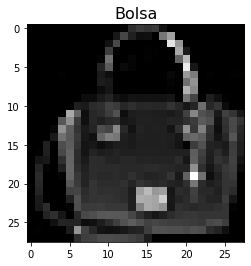

In [11]:
i = random.randint(1, 60000);
plt.imshow(training[i,1:].reshape((28, 28)), cmap = "gray");
labels = ['Camiseta', 'Calça', 'Sueter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota'];
label = labels[int(training[i, 0])];
plt.title(label, fontdict={'fontsize': 16});

In [12]:
# 0 -> Camiseta
# 1 -> Calça
# 2 -> Sueter
# 3 -> Vestido
# 4 -> Casaco
# 5 -> Sandália
# 6 -> Camisa
# 7 -> Tênis
# 8 -> Bolsa
# 9 -> Bota

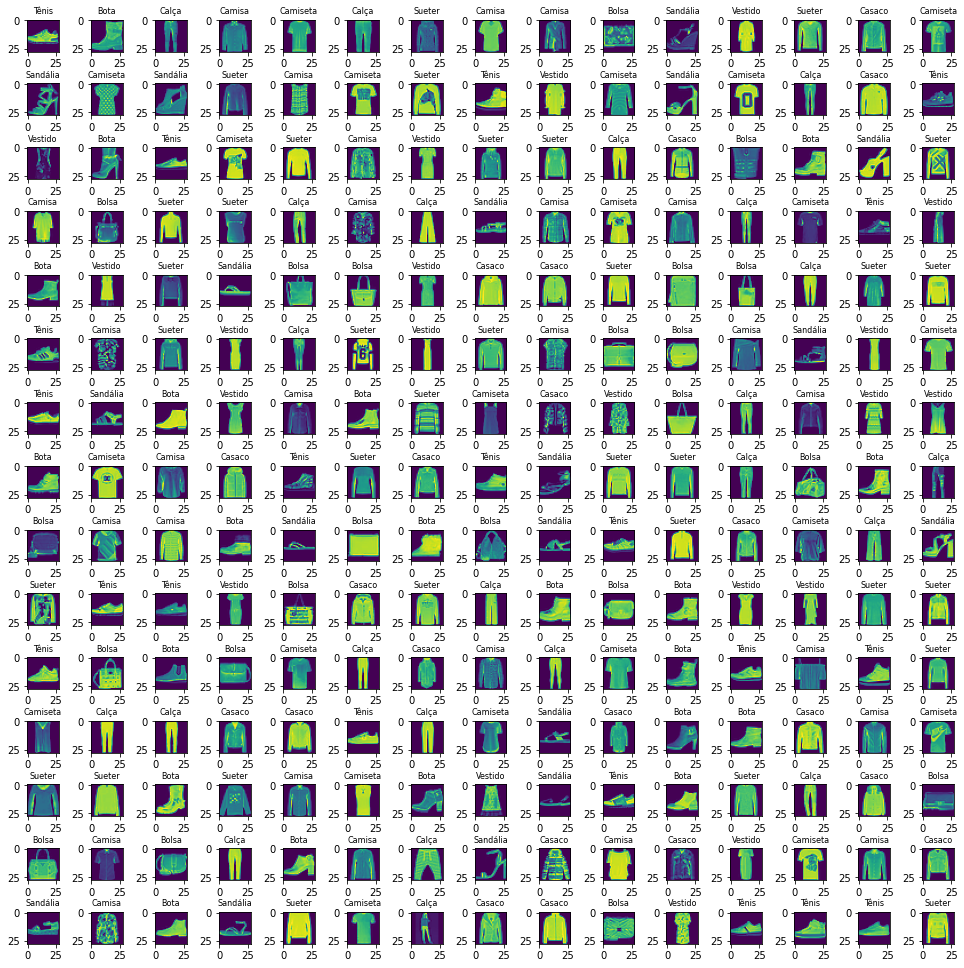

In [13]:
w_grid = 15
l_grid = 15

# Cria uma matriz 15 por 15 com quadrados 17px por 17px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Pega um índice aleatório dos dados de treinamento
  index = np.random.randint(0, n_training)
  # Define a imagem para o quadrado
  axes[i].imshow(training[index, 1:].reshape((28,28)))
  # Define o título para o quadrado
  axes[i].set_title(labels[int(training[index, 0])], fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)

# Etapa 04: Tratamento de dados

In [14]:
# Geralmente normalizamos os dados de entrada
x_train = training[:,1:] / 255

# A normalização do output ocorre apenas se os dados forem muitos discrepantes,
# neste caso temos os valores de 0 até 9
y_train = training[:,0]

In [15]:
x_test = testing[:,1:] / 255
y_test = testing[:,0]

In [16]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

# Etapa 05: Construção e treinamento do modelo

In [21]:
from tensorflow.keras import layers, models

In [22]:
cnn = models.Sequential()

# Adiciona camada convolucional com o input dos dados e 32 filtros
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
# Adiciona uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona mais uma camada convolucional com 64 filtros
# Geralmente aumentamos a quantidade de filtros conforme as camadas que vamos
# adicionando, entendendo que o processo de aprendizado vai ocorrendo de forma
# gradativa
#cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# Adiciona mais uma camada de pooling
#cnn.add(layers.MaxPooling2D(2,2))

# Adiciona uma camada flatten 
cnn.add(layers.Flatten())

# Adiciona uma camada dense
cnn.add(layers.Dense(64, activation = 'relu'))

# Adiciona mais uma camada dense
cnn.add(layers.Dense(64, activation = 'relu'))

# Adiciona uma camada softmax (adequada para nosso retorno da probabilidade das
# 10 categorias)
# https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 351,306
Trainable params: 351,306
Non-trainable params: 0
__________________________________________________

In [23]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [25]:
epochs_hist = cnn.fit(x_train, y_train, batch_size = 512, epochs = 200)

Epoch 1/200
118/118 [==============================] - 1s 8ms/step - loss: 0.2450 - accuracy: 0.9129
Epoch 2/200
118/118 [==============================] - 1s 7ms/step - loss: 0.2336 - accuracy: 0.9167
Epoch 3/200
118/118 [==============================] - 1s 7ms/step - loss: 0.2214 - accuracy: 0.9196
Epoch 4/200
118/118 [==============================] - 1s 7ms/step - loss: 0.2130 - accuracy: 0.9234
Epoch 5/200
118/118 [==============================] - 1s 7ms/step - loss: 0.2050 - accuracy: 0.9276
Epoch 6/200
118/118 [==============================] - 1s 7ms/step - loss: 0.1926 - accuracy: 0.9311
Epoch 7/200
118/118 [==============================] - 1s 7ms/step - loss: 0.1865 - accuracy: 0.9328
Epoch 8/200
118/118 [==============================] - 1s 7ms/step - loss: 0.1810 - accuracy: 0.9350
Epoch 9/200
118/118 [==============================] - 1s 7ms/step - loss: 0.1768 - accuracy: 0.9365
Epoch 10/200
118/118 [==============================] - 1s 7ms/step - loss: 0.1666 - accura

In [26]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

# Etapa 06: Avaliação do modelo

In [27]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8226 - accuracy: 0.9218


In [28]:
prediction_classes = cnn.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
prediction_classes

array([0, 1, 2, ..., 8, 8, 1])

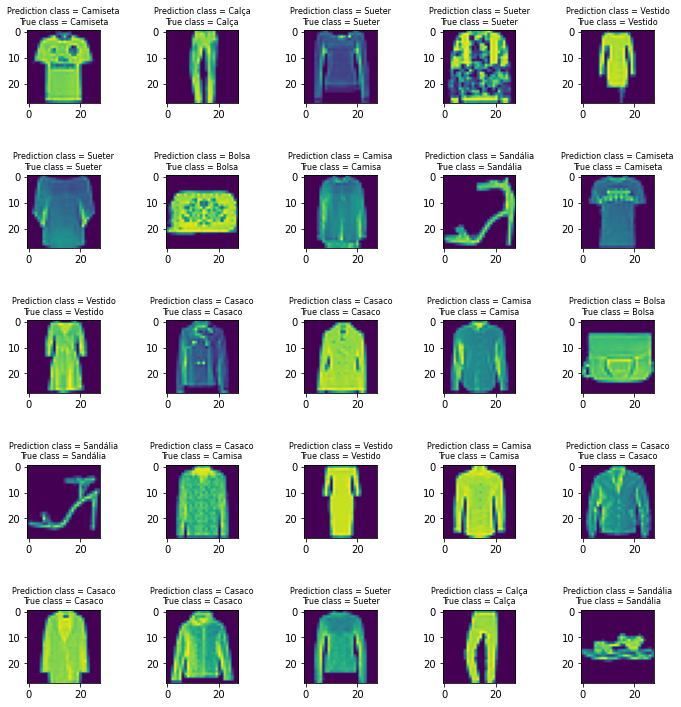

In [30]:
w_grid = 5
l_grid = 5

# Cria uma matriz 15 por 15 com quadrados 12px por 12px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (12,12))
axes = axes.ravel()
n_training = len(training)

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Define a imagem para o quadrado
  axes[i].imshow(x_test[i].reshape((28,28)))
  # Define o título para o quadrado
  axes[i].set_title('Prediction class = {}\nTrue class = {}'.format(labels[int(prediction_classes[i])], labels[int(y_test[i])]), fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)